In [10]:
# Importing libraries and dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('F:\MachineHack\Regression Analysis\Dicision Tree Regression\Profit.csv')
data

,Marketing Spend,Profit
0,471784.10,192261.83
1,443898.53,191792.06
2,407934.54,191050.39
3,383199.62,182901.99
4,366168.42,166187.94
...,...,...
195,1853.93,64876.08
196,297064.46,49440.75
197,210975.00,42509.73
198,210975.00,35623.41


In [11]:
# Defining input and output features

x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(x.shape, y.shape)

(200, 1) (200,)


In [12]:
# Defining training and testing dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(180, 1)
(20, 1)
(180,)
(20,)


In [13]:
# Defining and training Decision tree regression model

from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [14]:
# Making predictions on testing dataset
y_pred = reg.predict(x_test)

# Comparing predicted profits and actual profits
pd.DataFrame(data={'Predicted':y_pred, 'Actual':y_test})

,Predicted,Actual
0,124266.900,124266.90
1,118474.030,118424.03
2,155752.600,155752.60
3,73269.318,35673.41
4,105008.310,104958.31
5,97427.840,97377.84
6,156991.120,156991.12
7,49490.750,49530.75
8,141585.520,141585.52
9,191050.390,191000.39


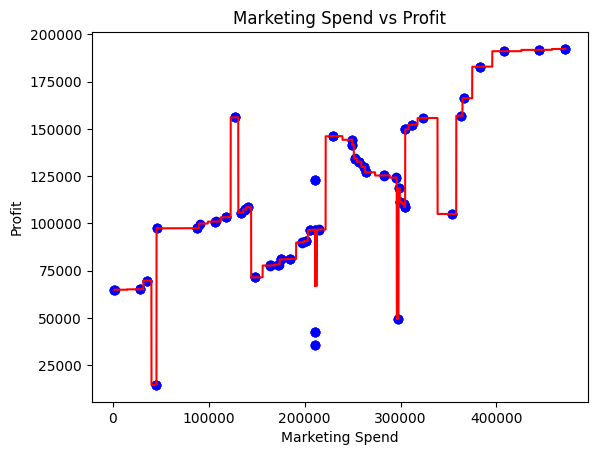

In [15]:
# Visualizing the model performance

x_grid = np.arange(min(x_train), max(x_train), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))

plt.scatter(x_train, y_train, color='blue')
plt.plot(x_grid, reg.predict(x_grid), color='red')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [16]:
# Evaluating the model performance using proper metrics
# 1. MSE(Mean Squared Error)
# 2. RMSE(Root Mean Squared Error)
# 3. R-Squared

from sklearn.metrics import mean_squared_error, r2_score
import math

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE = ',mse)
print('RMSE = ',rmse)
print('R-Squared = ',r2)

MSE =  70673604.91722319
RMSE =  8406.75947777877
R-Squared =  0.949097198306818


In [17]:
# Note that value of R-Squared is very close to 1.
# This means that our model is well fitted